<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [52]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [53]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv("dispo_alimentaire.csv")

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv("aide_alimentaire.csv")

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv("sous_nutrition.csv")


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [54]:
# Affichage du dataframe population


population  

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


In [55]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [56]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes

population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [57]:
#Affichage les 5 premières lignes de la table

population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [58]:
# Création d'une copie du DF population pour les manipulations 

copy_population = population.copy()

In [59]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000

copy_population["Valeur"] = copy_population["Valeur"].apply(lambda v : v * 1000)


In [60]:
copy_population["Année"] = copy_population["Année"].astype(object)                   

# Changement de la colonne Année en objet qui va être utilisé dans une jointure plus tard

In [61]:
copy_population.dtypes

Zone       object
Année      object
Valeur    float64
dtype: object

In [62]:
copy_population                                   # Apres avoir multiplé copy DF population par 1000

,Zone,Année,Valeur
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0
...,...,...,...
1411,Zimbabwe,2014,13586707.0
1412,Zimbabwe,2015,13814629.0
1413,Zimbabwe,2016,14030331.0
1414,Zimbabwe,2017,14236595.0


In [63]:
#changement du nom de la colonne Valeur par Population


copy_population.rename(columns= {"Valeur": "Population"}, inplace=True)

In [64]:
population.head()                                                                            # le DF originel reste inchangé !!!

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [65]:
#Affichage les 5 premières lignes de la table pour voir les modifications


copy_population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [66]:
# Affichage du dataframe dispo_alimentaire

dispo_alimentaire     

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [67]:
#Afficher les dimensions du dataset


dispo_alimentaire.shape


(15605, 18)

In [68]:
#Consulter le nombre de colonnes

copy_dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          15605 non-null  float64
 4   Autres Utilisations                                            15605 non-null  float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 15605 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         15605 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [69]:
#Affichage les 5 premières lignes de la table


dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [70]:
copy_dispo_alimentaire = dispo_alimentaire.copy()

In [71]:
copy_dispo_alimentaire

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [72]:
#remplacement des NaN dans le dataset par des 0


copy_dispo_alimentaire = copy_dispo_alimentaire.fillna(0) 

In [73]:
copy_dispo_alimentaire

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg

def MultMille(x):
    return x * 1000000


copy_dispo_alimentaire[["Aliments pour animaux", "Autres Utilisations", "Disponibilité intérieure", "Exportations - Quantité", 
                   "Importations - Quantité", "Nourriture", "Pertes", "Production", "Semences", "Traitement", 
                   "Variation de stock"]] = copy_dispo_alimentaire[["Aliments pour animaux", "Autres Utilisations", 
                    "Disponibilité intérieure", "Exportations - Quantité", 
                   "Importations - Quantité", "Nourriture", "Pertes", "Production", "Semences", "Traitement", 
                   "Variation de stock"]].apply(MultMille)

In [75]:
dispo_alimentaire                                                                    # Le dataframe original reste inchangé !!!

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [76]:
#Affichage les 5 premières lignes de la table


copy_dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [77]:
# Affichage du dataframe aide_alimentaire

aide_alimentaire

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [78]:
#Afficher les dimensions du dataset

print("Le tableau comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [79]:
#Consulter le nombre de colonnes


print(len(aide_alimentaire.columns))


4


In [80]:
#Affichage les 5 premières lignes de la table

aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [81]:
copy_aide_alimentaire = aide_alimentaire.copy() 

In [82]:
copy_aide_alimentaire

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [83]:
#changement du nom de la colonne Pays bénéficiaire par Zone

copy_aide_alimentaire.rename(columns= {"Pays bénéficiaire": "Zone"}, inplace=True)

In [84]:
copy_aide_alimentaire

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [85]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg


copy_aide_alimentaire["Valeur"] = copy_aide_alimentaire["Valeur"].apply(lambda x: x * 1000)


In [86]:
aide_alimentaire.head()                                                                         # Le DF originel reste inchangé

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [87]:
#Affichage les 5 premières lignes de la table


copy_aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [88]:
# Affichage du dataframe "sous_nutrition"


sous_nutrition

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [89]:
#Afficher les dimensions du dataset


sous_nutrition.shape

(1218, 3)

In [90]:
#Consulter le nombre de colonnes


print(len(sous_nutrition.columns))

3


In [91]:
#Afficher les 5 premières lignes de la table


sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [92]:
copy_sous_nutrition = sous_nutrition.copy()

In [93]:
copy_sous_nutrition

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [150]:
#Conversion de la colonne Valeur en numérique



#copy_sous_nutrition['Valeur'] = pd.to_numeric(copy_sous_nutrition['Valeur'])


In [95]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0


copy_sous_nutrition['Valeur'] = pd.to_numeric(copy_sous_nutrition['Valeur'], errors="coerce")


In [96]:
#Puis remplacement des NaN en 0

copy_sous_nutrition['Valeur'].fillna(0, inplace=True)

In [97]:
copy_sous_nutrition

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,0.0
1214,Zimbabwe,2014-2016,0.0
1215,Zimbabwe,2015-2017,0.0
1216,Zimbabwe,2016-2018,0.0


In [98]:
copy_sous_nutrition.dtypes

Zone       object
Année      object
Valeur    float64
dtype: object

In [99]:
sous_nutrition.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

In [100]:
#changement du nom de la colonne Valeur par sous_nutrition


copy_sous_nutrition.rename(columns= {"Valeur": "Sous_nutrition"}, inplace=True)

In [101]:
copy_sous_nutrition

,Zone,Année,Sous_nutrition
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,0.0
1214,Zimbabwe,2014-2016,0.0
1215,Zimbabwe,2015-2017,0.0
1216,Zimbabwe,2016-2018,0.0


In [102]:
#Multiplication de la colonne sous_nutrition par 1000000

copy_sous_nutrition["Sous_nutrition"] = copy_sous_nutrition["Sous_nutrition"].apply(lambda z : z * 1000000)

In [103]:

copy_sous_nutrition

,Zone,Année,Sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0
...,...,...,...
1213,Zimbabwe,2013-2015,0.0
1214,Zimbabwe,2014-2016,0.0
1215,Zimbabwe,2015-2017,0.0
1216,Zimbabwe,2016-2018,0.0


In [104]:
sous_nutrition.head()                                                           # Le DF sous_nutrition original reste inchangé 

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [105]:
#Afficher les 5 premières lignes de la table

copy_sous_nutrition.head()

,Zone,Année,Sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


# Fin du dataframe "sous_nutrition"

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

# JOINTURE : dataframes "sous_nutrition" & "population"

In [106]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017

sous_filt_2017 = (copy_sous_nutrition["Année"] == "2016-2018")
copy_sous_nutrition[sous_filt_2017]


pop_filt_2017 = (copy_population["Année"] == 2017)
copy_population[pop_filt_2017]


merge_sous_pop_2017 = pd.merge(copy_sous_nutrition[sous_filt_2017], copy_population[pop_filt_2017], on="Zone")


In [107]:
#Affichage du dataset

merge_sous_pop_2017

,Zone,Année_x,Sous_nutrition,Année_y,Population
0,Afghanistan,2016-2018,10500000.0,2017,36296113.0
1,Afrique du Sud,2016-2018,3100000.0,2017,57009756.0
2,Albanie,2016-2018,100000.0,2017,2884169.0
3,Algérie,2016-2018,1300000.0,2017,41389189.0
4,Allemagne,2016-2018,0.0,2017,82658409.0
...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2016-2018,8000000.0,2017,29402484.0
199,Viet Nam,2016-2018,6500000.0,2017,94600648.0
200,Yémen,2016-2018,0.0,2017,27834819.0
201,Zambie,2016-2018,0.0,2017,16853599.0


In [108]:
#Calcul et affichage du nombre de personnes en état de sous nutrition


result = round(merge_sous_pop_2017["Sous_nutrition"].sum() / merge_sous_pop_2017["Population"].sum() * 100,2)

nombre_sous_nutrition = (7.1 / 100 * copy_population["Population"].sum())

print(result,"% de la population mondiale est en état de sous nutrition")

print(nombre_sous_nutrition, "est le total nombe de personnes en état de sous nutrition")



7.1 % de la population mondiale est en état de sous nutrition
3161649032.97 est le total nombe de personnes en état de sous nutrition


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

Combien mange en moyenne un être humain ? Source => 

Un être humain a besoin d'environ 2500 calories par jour [source](https://www.toutelanutrition.com/wikifit/nutrition/alimentation/comment-calculer-ses-calories-pour-maigrir#:~:text=Pour%20une%20femme%20de%20taille,de%202600%20calories%20par%20jour.) 

# JOINTURE : dataframes "population" & "dispo_alimentaire"

In [109]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier 
# la population


pop_filt_2017 = (copy_population['Année'] == 2017)
copy_population[pop_filt_2017]


merge_dispo_pop_2017 = pd.merge(copy_population[pop_filt_2017], dispo_alimentaire, on='Zone')


In [110]:
#Affichage du nouveau dataframe

merge_dispo_pop_2017


,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2017,36296113.0,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2017,36296113.0,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2017,36296113.0,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Zimbabwe,2017,14236595.0,Viande de Suides,animale,NaN,NaN,24.0,2.65,2.25,0.83,37.0,0.0,6.0,37.0,NaN,32.0,NaN,0.0,0.0
15412,Zimbabwe,2017,14236595.0,Viande de Volailles,animale,NaN,NaN,17.0,4.97,1.05,1.69,70.0,0.0,6.0,70.0,NaN,64.0,NaN,NaN,NaN
15413,Zimbabwe,2017,14236595.0,"Viande, Autre",animale,NaN,1.0,7.0,2.29,0.21,1.12,34.0,3.0,1.0,32.0,NaN,36.0,NaN,0.0,NaN
15414,Zimbabwe,2017,14236595.0,Vin,vegetale,NaN,NaN,1.0,0.27,NaN,NaN,4.0,0.0,2.0,4.0,NaN,2.0,NaN,NaN,0.0


In [111]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement en 2017

merge_dispo_pop_2017["dispo_kcal"] = (merge_dispo_pop_2017["Disponibilité alimentaire (Kcal/personne/jour)"] 
                                  * merge_dispo_pop_2017["Population"] * 365)

total_dispo_kal = merge_dispo_pop_2017["dispo_kcal"].sum()

print("Les calories disponibles mondialement sont: ", total_dispo_kal)


Les calories disponibles mondialement sont:  7635429388975815.0


In [112]:
merge_dispo_pop_2017                                                           # POUR VERFIFIER LA CREATION DE LA COLONNE "kcal"

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
0,Afghanistan,2017,36296113.0,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,...,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,6.624041e+10
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,...,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,1.324808e+10
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,...,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.324808e+10
3,Afghanistan,2017,36296113.0,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00
4,Afghanistan,2017,36296113.0,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,...,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,5.299232e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Zimbabwe,2017,14236595.0,Viande de Suides,animale,NaN,NaN,24.0,2.65,2.25,...,37.0,0.0,6.0,37.0,NaN,32.0,NaN,0.0,0.0,1.247126e+11
15412,Zimbabwe,2017,14236595.0,Viande de Volailles,animale,NaN,NaN,17.0,4.97,1.05,...,70.0,0.0,6.0,70.0,NaN,64.0,NaN,NaN,NaN,8.833807e+10
15413,Zimbabwe,2017,14236595.0,"Viande, Autre",animale,NaN,1.0,7.0,2.29,0.21,...,34.0,3.0,1.0,32.0,NaN,36.0,NaN,0.0,NaN,3.637450e+10
15414,Zimbabwe,2017,14236595.0,Vin,vegetale,NaN,NaN,1.0,0.27,NaN,...,4.0,0.0,2.0,4.0,NaN,2.0,NaN,NaN,0.0,5.196357e+09


In [113]:
#Calcul du nombre d'humains pouvant être nourris EN 2017

total_humains_nourris = (total_dispo_kal / (2500*365))

print("Le nombre d'humains pouvant être nourris est : ", total_humains_nourris)

print("La proportion est :", total_humains_nourris/copy_population[pop_filt_2017]["Population"].sum()*100,"%")


Le nombre d'humains pouvant être nourris est :  8367593850.9324
La proportion est : 110.85645442809752 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [114]:
#Transfert des données avec les végétaux dans un nouveau dataframe


veg_filt_2017 = merge_dispo_pop_2017["Origine"] == "vegetale" 

df_vegetaux =  merge_dispo_pop_2017.loc[veg_filt_2017]

df_vegetaux

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,...,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,1.324808e+10
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,...,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.324808e+10
3,Afghanistan,2017,36296113.0,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00
4,Afghanistan,2017,36296113.0,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,...,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,5.299232e+10
6,Afghanistan,2017,36296113.0,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,...,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Zimbabwe,2017,14236595.0,Sésame,vegetale,NaN,NaN,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.000000e+00
15407,Zimbabwe,2017,14236595.0,Thé,vegetale,NaN,NaN,1.0,0.54,NaN,...,8.0,12.0,1.0,8.0,NaN,19.0,NaN,NaN,NaN,5.196357e+09
15408,Zimbabwe,2017,14236595.0,Tomates,vegetale,NaN,NaN,1.0,1.80,0.01,...,27.0,0.0,3.0,25.0,1.0,24.0,NaN,NaN,NaN,5.196357e+09
15414,Zimbabwe,2017,14236595.0,Vin,vegetale,NaN,NaN,1.0,0.27,NaN,...,4.0,0.0,2.0,4.0,NaN,2.0,NaN,NaN,0.0,5.196357e+09


In [115]:
#Calcul du nombre de kcal disponible pour les végétaux 

nombre_kcal = df_vegetaux["dispo_kcal"].sum()

print("Le nombre de kcal disponible pour les végétaux est:", nombre_kcal)

Le nombre de kcal disponible pour les végétaux est: 6300178937197865.0


In [116]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux 

nombre_humains_veg = (df_vegetaux["dispo_kcal"].sum() / (2500 *365))

print("Le nombre d'humains pouvant être nourris avec les végétaux est :", nombre_humains_veg)

print("La proportion est :",nombre_humains_veg / copy_population[pop_filt_2017]["Population"].sum() * 100,"%")


Le nombre d'humains pouvant être nourris avec les végétaux est : 6904305684.6004
La proportion est : 91.47036317940695 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [117]:
#Calcul de la disponibilité totale


dispo_int_tot = copy_dispo_alimentaire["Disponibilité intérieure"].sum()

dispo_int_tot

9848994000000.0

In [118]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 


for column in ["Aliments pour animaux", "Pertes", "Nourriture", "Traitement", "Semences", "Traitement"]:
    print(column, ":",(copy_dispo_alimentaire[column].sum() * 100 / dispo_int_tot),"%")
      

Aliments pour animaux : 13.242418464261426 %
Pertes : 4.606541541196999 %
Nourriture : 49.51021393657058 %
Traitement : 22.384895350733284 %
Semences : 1.5705258831511117 %
Traitement : 22.384895350733284 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [119]:
#Création d'une liste avec toutes les variables


Cereales_liste = ["Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle", "Avoine", "Millet", "Sorgho", "Céréales, Autres"]

In [120]:
#Création d'un dataframe avec les informations uniquement pour ces céréales

cereales_filt = copy_dispo_alimentaire.Produit.isin(Cereales_liste)

df_Cereales = copy_dispo_alimentaire[cereales_filt]

df_Cereales

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15545,Îles Salomon,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
15568,Îles Salomon,Maïs,vegetale,0.0,0.0,1.0,0.15,0.01,0.03,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
15575,Îles Salomon,Orge,vegetale,0.0,0.0,0.0,0.07,0.00,0.01,1.000000e+06,0.0,1.000000e+06,0.000000e+00,0.0,0.000000e+00,0.0,1000000.0,0.0
15591,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12000000.0,623.0,63.76,1.36,10.90,4.900000e+07,0.0,4.700000e+07,3.600000e+07,1000000.0,3.000000e+06,0.0,0.0,0.0


In [121]:
#Affichage de la proportion d'alimentation animale

prop_alim_animale = (df_Cereales['Aliments pour animaux'].sum() / df_Cereales['Disponibilité intérieure'].sum() * 100)

print("La proportion de l'alimentation animale est:", prop_alim_animale, "%")

La proportion de l'alimentation animale est: 36.291456706047654 %


In [122]:
#Affichage de la proportion d'alimentation humaine

prop_alim_humaine = (df_Cereales["Nourriture"].sum() / df_Cereales['Disponibilité intérieure'].sum() * 100)


print("La proportion de l'alimentation humaine est:", prop_alim_humaine, "%")

La proportion de l'alimentation humaine est: 42.75074480712289 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [123]:
#Création de la colonne proportion par pays

merge_sous_pop_2017["Proportion par pays"]= (merge_sous_pop_2017["Sous_nutrition"] / merge_sous_pop_2017["Population"]) * 100                                   


merge_sous_pop_2017


,Zone,Année_x,Sous_nutrition,Année_y,Population,Proportion par pays
0,Afghanistan,2016-2018,10500000.0,2017,36296113.0,28.928718
1,Afrique du Sud,2016-2018,3100000.0,2017,57009756.0,5.437666
2,Albanie,2016-2018,100000.0,2017,2884169.0,3.467203
3,Algérie,2016-2018,1300000.0,2017,41389189.0,3.140917
4,Allemagne,2016-2018,0.0,2017,82658409.0,0.000000
...,...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2016-2018,8000000.0,2017,29402484.0,27.208586
199,Viet Nam,2016-2018,6500000.0,2017,94600648.0,6.870989
200,Yémen,2016-2018,0.0,2017,27834819.0,0.000000
201,Zambie,2016-2018,0.0,2017,16853599.0,0.000000


In [124]:
#affichage après trie des 10 pires pays

dix_pires_pays= merge_sous_pop_2017.sort_values(by="Proportion par pays", ascending=False).head(10)

dix_pires_pays

,Zone,Année_x,Sous_nutrition,Année_y,Population,Proportion par pays
78,Haïti,2016-2018,5300000.0,2017,10982366.0,48.259182
157,République populaire démocratique de Corée,2016-2018,12000000.0,2017,25429825.0,47.188685
108,Madagascar,2016-2018,10500000.0,2017,25570512.0,41.062924
103,Libéria,2016-2018,1800000.0,2017,4702226.0,38.279742
100,Lesotho,2016-2018,800000.0,2017,2091534.0,38.249438
183,Tchad,2016-2018,5700000.0,2017,15016753.0,37.957606
161,Rwanda,2016-2018,4200000.0,2017,11980961.0,35.055619
121,Mozambique,2016-2018,9400000.0,2017,28649018.0,32.810898
186,Timor-Leste,2016-2018,400000.0,2017,1243258.0,32.173531
0,Afghanistan,2016-2018,10500000.0,2017,36296113.0,28.928718


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [125]:
#calcul du total de l'aide alimentaire par pays


zone_grp = copy_aide_alimentaire.groupby(["Zone"])

zone_grp["Valeur"].sum()

Zone
Afghanistan     185452000
Algérie          81114000
Angola            5014000
Bangladesh      348188000
Bhoutan           2666000
                  ...    
Zambie            3026000
Zimbabwe         62570000
Égypte            1122000
Équateur          1362000
Éthiopie       1381294000
Name: Valeur, Length: 76, dtype: int64

In [126]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire


zone_grp["Valeur"].agg(sum).sort_values(ascending=False).head(10)

Zone
République arabe syrienne           1858943000
Éthiopie                            1381294000
Yémen                               1206484000
Soudan du Sud                        695248000
Soudan                               669784000
Kenya                                552836000
Bangladesh                           348188000
Somalie                              292678000
République démocratique du Congo     288502000
Niger                                276344000
Name: Valeur, dtype: int64

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [127]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 

df_pays_benef = copy_aide_alimentaire[['Zone', 'Année', 'Valeur']]

df_pays_benef = df_pays_benef.groupby(["Zone", "Année"]).sum().reset_index()

df_pays_benef

,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000
...,...,...,...
223,Égypte,2013,1122000
224,Équateur,2013,1362000
225,Éthiopie,2013,591404000
226,Éthiopie,2014,586624000


In [128]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire

liste_cinq_pays = ["République arabe syrienne", "Éthiopie", "Yémen", "Soudan du Sud", "Soudan"]

In [129]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire

# il faut d'abord trouver les cinq pays 


zone_grp["Valeur"].agg(sum).sort_values(ascending=False).head(5)

Zone
République arabe syrienne    1858943000
Éthiopie                     1381294000
Yémen                        1206484000
Soudan du Sud                 695248000
Soudan                        669784000
Name: Valeur, dtype: int64

In [130]:
#On filtre sur le dataframe avec notre liste

top_cinq_filt = df_pays_benef.Zone.isin(liste_cinq_pays)

df_pays_benef[top_cinq_filt]

,Zone,Année,Valeur
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


In [131]:
# Affichage des pays avec l'aide alimentaire par année

#df_pays_benef

data_pays_benef = copy_aide_alimentaire.pivot_table(index= "Zone", columns= "Année", values= "Valeur", aggfunc= "sum")

data_pays_benef

Année,2013,2014,2015,2016
Zone,,,,
Afghanistan,128238000.0,57214000.0,NaN,NaN
Algérie,35234000.0,18980000.0,17424000.0,9476000.0
Angola,5000000.0,14000.0,NaN,NaN
Bangladesh,131018000.0,194628000.0,22542000.0,NaN
Bhoutan,1724000.0,146000.0,578000.0,218000.0
...,...,...,...,...
Zambie,328000.0,2698000.0,NaN,NaN
Zimbabwe,21252000.0,26600000.0,14718000.0,NaN
Égypte,1122000.0,NaN,NaN,NaN


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [132]:
#Calcul de la disponibilité en kcal par personne par jour par pays

grp_country = merge_dispo_pop_2017.groupby(["Zone"])

df_grp_country = grp_country["Disponibilité alimentaire (Kcal/personne/jour)"].sum().reset_index()
df_grp_country

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0
...,...,...
167,Émirats arabes unis,3275.0
168,Équateur,2346.0
169,États-Unis d'Amérique,3682.0
170,Éthiopie,2129.0


In [133]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 

df_grp_country.sort_values(by= "Disponibilité alimentaire (Kcal/personne/jour)").head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
127,République centrafricaine,1879.0
164,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
132,République populaire démocratique de Corée,2093.0
150,Tchad,2109.0
165,Zimbabwe,2113.0
114,Ouganda,2126.0
152,Timor-Leste,2129.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [134]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 


#grp_country["Disponibilité alimentaire (Kcal/personne/jour)"].sum().sort_values(ascending=False).head(10)

df_grp_country.sort_values(by= "Disponibilité alimentaire (Kcal/personne/jour)", ascending=False).head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
157,Turquie,3708.0
169,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
166,Égypte,3518.0
4,Allemagne,3503.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [135]:
#création d'un dataframe avec uniquement la Thaïlande 

new_df_Thailande = merge_sous_pop_2017[merge_sous_pop_2017.Zone.str.contains("Thaïlande")]

new_df_Thailande

,Zone,Année_x,Sous_nutrition,Année_y,Population,Proportion par pays
185,Thaïlande,2016-2018,6200000.0,2017,69209810.0,8.958268


In [136]:
#Calcul de la sous nutrition en Thaïlande

prop_sous_nutr = ((new_df_Thailande["Sous_nutrition"] / new_df_Thailande["Population"]) * 100)


print(prop_sous_nutr.to_string(index=False),"% est la proportion en sous nutrition en Thaïlande")


8.958268 % est la proportion en sous nutrition en Thaïlande


In [137]:
#On calcule la proportion exportée en fonction de la proportion


manioc_filt = (copy_dispo_alimentaire['Produit'] == "Manioc") & (copy_dispo_alimentaire['Zone'] == "Thaïlande")

df_manioc_Thai = copy_dispo_alimentaire.loc[manioc_filt]

df_manioc_Thai

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0


In [141]:
grp_country["Disponibilité alimentaire (Kcal/personne/jour)"].sum().loc["Thaïlande"]

2785.0

In [139]:

result = (df_manioc_Thai['Exportations - Quantité'] / df_manioc_Thai['Production'] * 100) 

print(result.to_string(index=False),"% est la proportion du Manioc exportée en Thaïlande")
    
    

83.41273 % est la proportion du Manioc exportée en Thaïlande


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

#Rajouter en dessous toutes les analyses complémentaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"

1. On peut extraire de la liste "Les 10 pays qui ont le plus bénéficié de l'aide alimentaire" les pays qui semblent être le 
   plus en difficulté au niveau alimentaire.
   
2. De la liste "10 pays qui ont la disponibilté alimentaire", on peut y trouver les pays qui ont de la disponibilté. 

In [146]:
zone = ["Haïti", "Corée", "Madagascar", "Libéria", "Lesotho", "Tchad", "Rwanda", "Mozambique", "Timor-Leste", "Afghanistan"] 

proportion_par_pays= [48.259182, 47.188685, 41.062924, 38.279742, 38.249438, 37.957606, 35.055619, 32.810898, 32.173531,
         28.928718]

Top_dix_df = pd.DataFrame({"Zone": zone, "Proportion_par_pays": proportion_par_pays}) 
Top_dix_df 

,Zone,Proportion_par_pays
0,Haïti,48.259182
1,Corée,47.188685
2,Madagascar,41.062924
3,Libéria,38.279742
4,Lesotho,38.249438
5,Tchad,37.957606
6,Rwanda,35.055619
7,Mozambique,32.810898
8,Timor-Leste,32.173531
9,Afghanistan,28.928718


Text(0.5, 1.0, 'Les 10 pays où la proportion de personnes en état de sous nutrition est la plus forte en 2017')

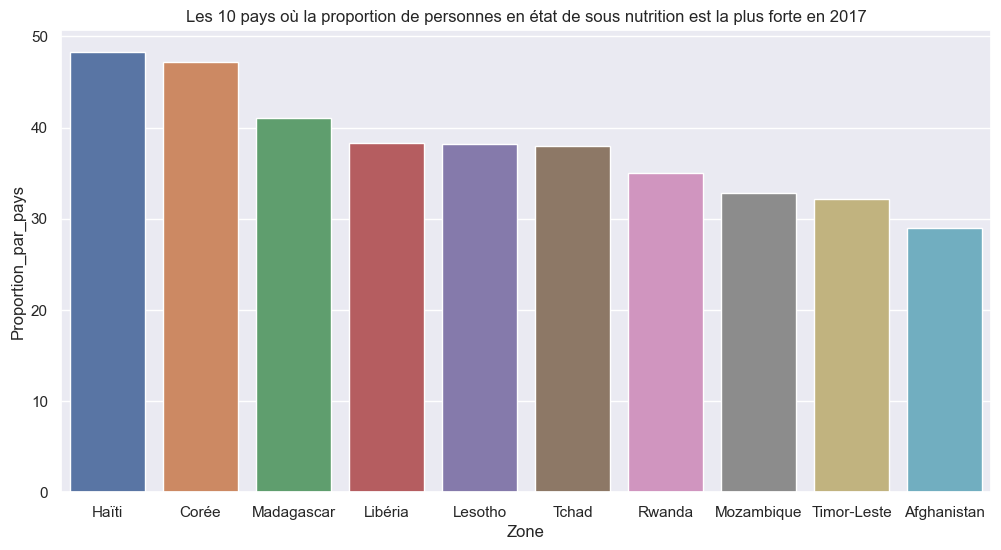

In [147]:
plt.figure(figsize=(12,6))
sns.barplot(x=Top_dix_df['Zone'], y=Top_dix_df['Proportion_par_pays'], data=Top_dix_df) 
plt.title("Les 10 pays où la proportion de personnes en état de sous nutrition est la plus forte en 2017")

In [142]:
sns.set_theme()

data = [13, 5, 50, 22, 2, 22]

alimentation = ["Aliments pour animaux", "Pertes", "Nourriture", "Traitement","Semences", "Traitement"]

df_alim = pd.DataFrame({"Data": data, "Alimentation": alimentation}) 
df_alim

,Data,Alimentation
0,13,Aliments pour animaux
1,5,Pertes
2,50,Nourriture
3,22,Traitement
4,2,Semences
5,22,Traitement


Text(0.5, 1.0, 'Répartition de la disponibilité intérieure')

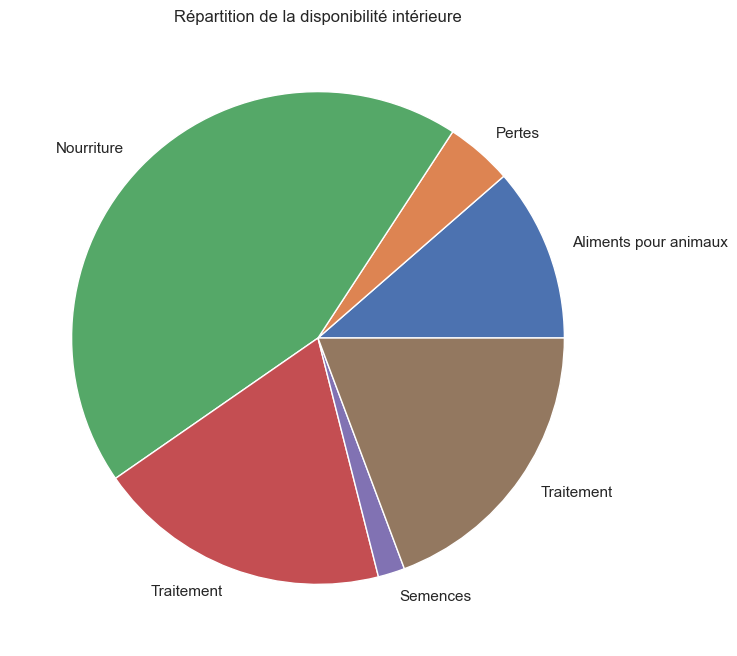

In [143]:
plt.figure(figsize=(16,8))
plt.pie(data, labels=alimentation)
plt.show
plt.title("Répartition de la disponibilité intérieure")


In [148]:
df_cinq_evol = df_pays_benef[top_cinq_filt]

df_cinq_evol

,Zone,Année,Valeur
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


Text(0.5, 1.0, 'Évolution de l’aide alimentaire des 5 pays qui en ont le plus bénéficié entre 2013 & 2016')

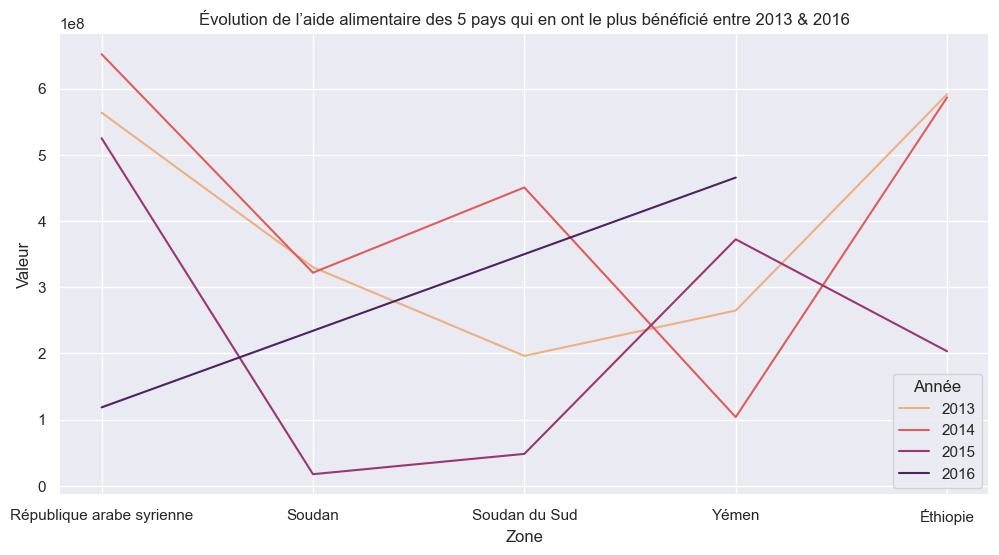

In [149]:
plt.figure(figsize=(12,6))
sns.lineplot(x= "Zone", y="Valeur", data= df_cinq_evol, hue= "Année", palette= "flare")
plt.title("Évolution de l’aide alimentaire des 5 pays qui en ont le plus bénéficié entre 2013 & 2016")

In [ ]:
new_df_dispo = df_grp_country.sort_values(by= "Disponibilité alimentaire (Kcal/personne/jour)").head(10)
new_df_dispo

In [ ]:
plt.figure(figsize=(18,9))
sns.barplot(x='Zone', y='Disponibilité alimentaire (Kcal/personne/jour)', data=new_df_dispo) 
plt.title("Liste des 10 pays qui ont la plus forte disponibilité alimentaire par habitant")